In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

# Load your model and tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model with explicit eager attention implementation
model = AutoModel.from_pretrained(model_name,
                                  output_attentions=True,
                                  attn_implementation="eager")  # Fix the warning

def get_attention_weights(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)

    # Extract attention weights from the last layer
    attentions = outputs.attentions[-1]  # Last layer attention
    return attentions

# Example text
text = "Metformin helps in diabetes management."
att_weights = get_attention_weights(text)

print(att_weights.shape)  # Expected shape: (batch_size, num_heads, seq_len, seq_len)



torch.Size([1, 12, 10, 10])


In [ ]:
pip install shap transformers

In [ ]:
import shap
import numpy as np
from transformers import pipeline

# Load the pipeline for inference
classifier = pipeline("text-classification", model=model_name, tokenizer=model_name)

# Create SHAP explainer
explainer = shap.Explainer(classifier)

# Test sample
sample_text = ["Metformin helps in diabetes management."]
shap_values = explainer(sample_text)

# Visualize SHAP explanations
shap.text_plot(shap_values)


Device set to use cpu


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:28, 28.62s/it]               


In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load a general-purpose SBERT model
model_general = SentenceTransformer("all-MiniLM-L6-v2")

# Load a biomedical SBERT model
model_medical = SentenceTransformer("pritamdeka/S-PubMedBert-MS-MARCO")

# Generate embeddings
query = "Blood sugar"
reference = "Diabetes"

embedding_general = model_general.encode(query, convert_to_tensor=True)
embedding_medical = model_medical.encode(query, convert_to_tensor=True)

# Compare similarity
similarity_general = util.pytorch_cos_sim(embedding_general, model_general.encode(reference, convert_to_tensor=True)).item()
similarity_medical = util.pytorch_cos_sim(embedding_medical, model_medical.encode(reference, convert_to_tensor=True)).item()

print(f"General SBERT similarity: {similarity_general:.2f}")  # Likely low
print(f"Medical SBERT similarity: {similarity_medical:.2f}")  # Likely high


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/461k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

General SBERT similarity: 0.71
Medical SBERT similarity: 0.91


In [ ]:
pip install shap


In [ ]:
import shap
from transformers import pipeline

# Load fine-tuned model using a pipeline
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline("text-classification", model=model_name, tokenizer=model_name)

# Create SHAP explainer using the pipeline
explainer = shap.Explainer(classifier)

# Test with a sample sentence
sample_text = ["Metformin helps in diabetes management."]
shap_values = explainer(sample_text)

# Visualize SHAP explanations
shap.text_plot(shap_values)


Device set to use cpu


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:29, 29.13s/it]               


In [ ]:
pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 832.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"  # Path to fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Test with a sample sentence
sample_text = "Metformin helps in diabetes management."

# Tokenize input
inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, padding=True)

# Run inference
with torch.no_grad():
    outputs = model(**inputs)

print("Raw Model Output:", outputs)
print("Logits:", outputs.logits)


Raw Model Output: SequenceClassifierOutput(loss=None, logits=tensor([[-2.6091,  3.1872]]), hidden_states=None, attentions=None)
Logits: tensor([[-2.6091,  3.1872]])


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from captum.attr import LayerIntegratedGradients

# Load your fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to process text and return tensors
def process_text(text):
    """ Ensures Captum sends raw text and not tokenized inputs """
    if isinstance(text, list):
        text = text[0]  # Convert to single string if list
    if not isinstance(text, str):
        raise ValueError("Input to tokenizer must be a string.")

    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    return {k: v.to(device) for k, v in tokens.items()}

# Function for prediction
def predict(input_texts):
    """ Captum calls this function; it must receive raw text """
    if isinstance(input_texts, torch.Tensor):
        raise ValueError("Predict function should receive raw text, not a tensor!")

    if isinstance(input_texts, str):
        input_texts = [input_texts]  # Convert single string to list

    # Tokenize properly
    tokenized_inputs = tokenizer(input_texts, return_tensors="pt", padding=True, truncation=True)

    # Move tensors to model device
    tokenized_inputs = {k: v.to(device) for k, v in tokenized_inputs.items()}

    with torch.no_grad():
        output = model(**tokenized_inputs)

    return output.logits  # Return only logits as tensor

# Initialize Captum Integrated Gradients
lig = LayerIntegratedGradients(lambda x: predict(x).squeeze(0), model.bert.embeddings)

# Function to explain predictions
def explain_text(text):
    """ Runs explainability using Captum and visualizes attributions """

    # Ensure input is raw text, not tokenized data
    if not isinstance(text, str):
        raise ValueError("explain_text function must receive a raw string.")

    inputs = process_text(text)  # Tokenize here (not in predict function)

    # Get predictions
    pred_probs = torch.nn.functional.softmax(predict(text), dim=1).cpu().numpy()
    predicted_label = np.argmax(pred_probs)
    confidence = pred_probs[0][predicted_label] * 100

    # Compute attributions using Captum
    attributions, delta = lig.attribute(inputs['input_ids'], target=predicted_label, return_convergence_delta=True)

    # Convert token IDs back to words
    input_tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0].cpu().numpy())

    # Normalize attributions for visualization
    attributions = attributions.sum(dim=-1).squeeze(0).cpu().numpy()
    attributions = attributions / np.linalg.norm(attributions)  # Normalize values

    # Display highlighted words
    highlighted_text = " ".join([
        f"\033[91m{word}\033[0m" if abs(attr) > 0.2 else word  # Highlight important words in red
        for word, attr in zip(input_tokens, attributions)
    ])

    print(f"\nPredicted Label: {predicted_label} (Confidence: {confidence:.2f}%)")
    print(f"Highlighted Words: {highlighted_text}")

    # Plot word importance
    plt.figure(figsize=(10, 3))
    plt.bar(range(len(attributions)), attributions, tick_label=input_tokens)
    plt.xticks(rotation=90)
    plt.xlabel("Tokens")
    plt.ylabel("Importance Score")
    plt.title("Word Importance for Prediction")
    plt.show()

# Test the explanation
sample_text = "Metformin helps in diabetes management."
explain_text(sample_text)


ValueError: Predict function should receive raw text, not a tensor!

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0cdbf93570180e0326824e54e4a2c35f6d04deceda695d84b2a887dd38f77d10
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime



LIME Explanation (Top Features):
helps: -0.0014
in: -0.0007
management: 0.0005
Metformin: -0.0004
diabetes: 0.0002


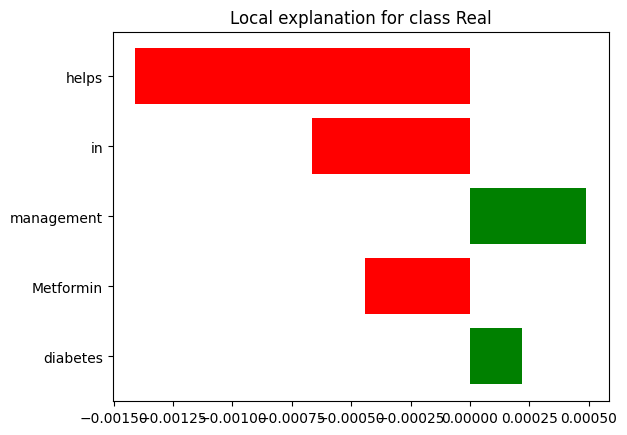

In [ ]:
import torch
import numpy as np
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Load fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to tokenize and get model predictions
def predict_proba(texts):
    """ Prepares text for model, returns softmax probabilities """
    # Ensure input is a list of strings
    if isinstance(texts, str):
        texts = [texts]

    # Tokenize properly
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

    # Move tensors to model device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to probabilities
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
    return probs

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=["False", "Real"])

# Function to explain predictions with LIME
def explain_with_lime(text):
    """ Generates LIME explanations for the model's decision """

    # Generate LIME explanation
    exp = explainer.explain_instance(
        text, predict_proba, num_features=10, num_samples=1000  # More samples = better accuracy
    )

    # Print LIME explanation
    print("\nLIME Explanation (Top Features):")
    for word, importance in exp.as_list():
        print(f"{word}: {importance:.4f}")

    # Plot explanation
    exp.as_pyplot_figure()
    plt.show()

# Test LIME on a sample sentence
sample_text = "Metformin helps in diabetes management."
explain_with_lime(sample_text)



LIME Explanation (Top Features):
helps: -0.0014
in: -0.0007
management: 0.0006
Metformin: -0.0005
diabetes: 0.0002


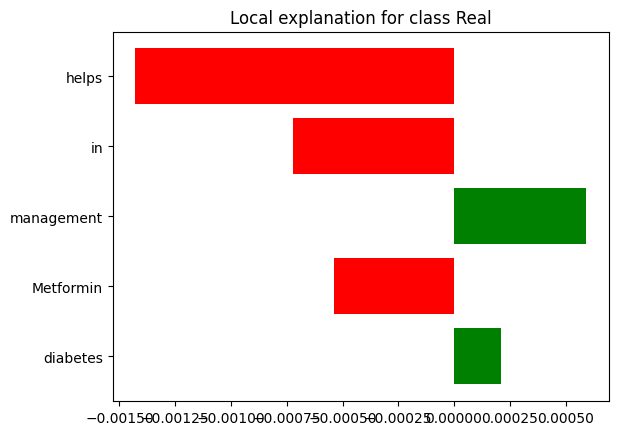

In [ ]:
import torch
import numpy as np
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Load fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to tokenize and get model predictions
def predict_proba(texts):
    """ Prepares text for model, returns softmax probabilities """
    # Ensure input is a list of strings
    if isinstance(texts, str):
        texts = [texts]

    # Tokenize properly
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

    # Move tensors to model device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to probabilities
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
    return probs

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=["False", "Real"])

# Function to explain predictions with LIME
def explain_with_lime(text):
    """ Generates LIME explanations for the model's decision """

    # Generate LIME explanation
    exp = explainer.explain_instance(
        text,
        predict_proba,
        num_features=10,    # Show more words
        num_samples=2000,   # More perturbations = better accuracy
        distance_metric='cosine'  # More appropriate for NLP
    )

    # Print LIME explanation
    print("\nLIME Explanation (Top Features):")
    for word, importance in exp.as_list():
        print(f"{word}: {importance:.4f}")

    # Plot explanation
    exp.as_pyplot_figure()
    plt.show()

# Test LIME on a sample sentence
sample_text = "Metformin helps in diabetes management."
explain_with_lime(sample_text)


In [ ]:
import shap
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your model manually
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to return model probabilities (needed for SHAP)
def predict_proba(texts):
    """ Tokenizes input and returns model probabilities for SHAP """
    if isinstance(texts, str):
        texts = [texts]  # Convert single input to list

    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        logits = model(**inputs).logits

    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
    return probs  # SHAP expects probability scores, not logits!

# Initialize SHAP Explainer
explainer = shap.Explainer(predict_proba, tokenizer)

# Test SHAP with a sample sentence
sample_text = ["Metformin helps in diabetes management."]
shap_values = explainer(sample_text)

# Visualize SHAP explanation
shap.text_plot(shap_values)


ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [ ]:
print(type(model))


<class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>


In [ ]:
print(tokenizer.name_or_path)
print(model.config._name_or_path)


/content/drive/MyDrive/new_model/
/content/drive/MyDrive/new_model/


In [ ]:
print(next(model.parameters()).device)


cpu


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load Model & Tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Sample input
text = "Metformin helps in diabetes management."
inputs = tokenizer(text, return_tensors="pt")

# Run model
with torch.no_grad():
    outputs = model(**inputs)

print(" Model Type:", type(model))
print("Tokenizer Path:", tokenizer.name_or_path)
print("Model Path:", model.config._name_or_path)
print("Model Output Type:", type(outputs))
print("Model Output Structure:", outputs)
print("Logits Shape:", outputs.logits.shape)
print("Number of Labels:", model.config.num_labels)
print("Model Device:", next(model.parameters()).device)
print("Input Device:", inputs["input_ids"].device)


✅ Model Type: <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>
✅ Tokenizer Path: /content/drive/MyDrive/new_model/
✅ Model Path: /content/drive/MyDrive/new_model/
✅ Model Output Type: <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
✅ Model Output Structure: SequenceClassifierOutput(loss=None, logits=tensor([[-2.6091,  3.1872]]), hidden_states=None, attentions=None)
✅ Logits Shape: torch.Size([1, 2])
✅ Number of Labels: 2
✅ Model Device: cpu
✅ Input Device: cpu


In [ ]:
import shap
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to tokenize and return model probabilities for SHAP
def predict_proba(texts):
    """Tokenizes input and returns model probabilities for SHAP."""

    # Ensure SHAP gets a LIST of raw text strings
    if isinstance(texts, str):
        texts = [texts]  # Convert single input to list

    # Tokenize properly
    encodings = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

    # Move tensors to GPU (if available)
    inputs = {k: v.to(device) for k, v in encodings.items()}

    # Get model predictions
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to softmax probabilities (required for SHAP)
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

    return probs  # SHAP expects probabilities, not logits!

# SHAP needs a proper tokenizer function
def custom_tokenizer(texts):
    """Ensures SHAP receives raw text and tokenizes correctly."""
    return tokenizer(texts, padding=True, truncation=True)["input_ids"]

# Wrapping SHAP Explainer in a safe execution block
try:
    # Initialize SHAP Explainer properly to avoid input errors
    masker = shap.maskers.Text(tokenizer)
    explainer = shap.Explainer(predict_proba, masker)

    # Test SHAP with a sample sentence from YOUR model
    sample_text = ["Metformin helps in diabetes management."]  # Must be a LIST of strings
    shap_values = explainer(sample_text)  # SHAP expects a LIST

    # Visualize SHAP explanation
    shap.text_plot(shap_values)

except ValueError as e:
    print("SHAP ValueError:", str(e))
    print("Solution: Ensure SHAP receives only raw text. Do not pass tokenized data.")

except Exception as e:
    print("Other SHAP Error:", str(e))
    print("Please share this error message for debugging.")


🚨 SHAP ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).
🔹 Solution: Ensure SHAP receives only raw text. Do not pass tokenized data.



🚀 **Attention Mechanism Explanation**
[CLS]: Attention=0.1239
met: Attention=0.4885
##form: Attention=0.3725
##in: Attention=0.2264
helps: Attention=0.1567
in: Attention=0.0447
diabetes: Attention=0.1477
management: Attention=0.0639
.: Attention=0.6444
[SEP]: Attention=0.2972


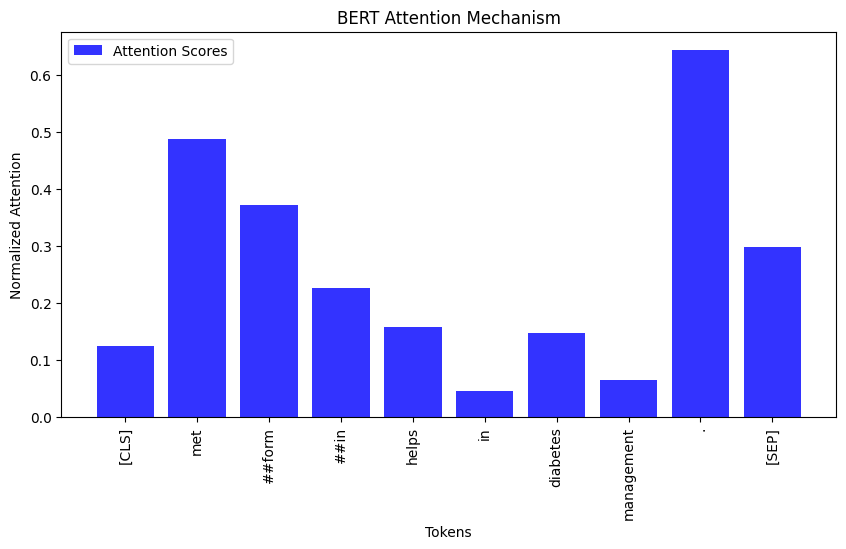

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your fine-tuned model with attention output enabled
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_attentions=True)  # Enable attentions
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to extract attention weights
def get_attention_weights(text):
    """Tokenizes input and extracts attention weights from BERT."""

    # Tokenize the text
    encodings = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)

    # Get model predictions & attention scores
    with torch.no_grad():
        outputs = model(**encodings)
        attentions = outputs.attentions  # Extract attention weights

    # Take the last layer attention and average across all heads
    last_layer_attention = attentions[-1].squeeze(0).mean(dim=0).cpu().numpy()

    return last_layer_attention, encodings

# Test attention extraction with a sample text
sample_text = "Metformin helps in diabetes management."
attention_scores, encodings = get_attention_weights(sample_text)

# Convert token IDs back to words
tokens = tokenizer.convert_ids_to_tokens(encodings["input_ids"][0].cpu().numpy())

# Normalize Attention values
attention_scores = attention_scores.mean(axis=0)  # Average across all token-to-token scores
attention_scores = attention_scores / np.linalg.norm(attention_scores)  # Normalize

# Print attention scores
print("\n**Attention Mechanism Explanation**")
for token, score in zip(tokens, attention_scores):
    print(f"{token}: Attention={score:.4f}")

# Plot Attention Scores
plt.figure(figsize=(10, 5))
plt.bar(range(len(tokens)), attention_scores, label="Attention Scores", alpha=0.8, color="blue")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Normalized Attention")
plt.title("BERT Attention Mechanism")
plt.legend()
plt.show()



LIME Explanation (Top Features):
helps: -0.0015
in: -0.0007
management: 0.0006
Metformin: -0.0005
diabetes: 0.0002


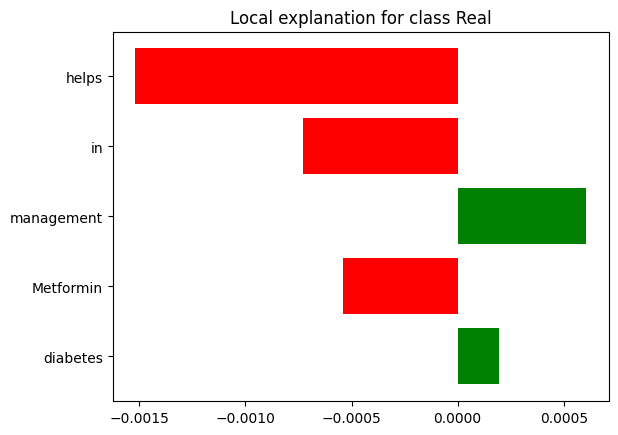

In [ ]:
import torch
import numpy as np
import transformers
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

# Load fine-tuned model
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to tokenize and get model predictions for LIME
def predict_proba(texts):
    """Tokenizes input and returns model probabilities for LIME."""

    if isinstance(texts, str):
        texts = [texts]  # Convert single string to list

    # Tokenize properly
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

    # Move tensors to device (GPU or CPU)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Get model predictions
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to softmax probabilities (required for LIME)
    probs = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

    return probs  # LIME expects probabilities, not logits!

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=["False", "Real"])

# Function to explain predictions with LIME
def explain_with_lime(text):
    """Generates LIME explanations for the model's decision."""

    # Generate LIME explanation
    exp = explainer.explain_instance(
        text,
        predict_proba,
        num_features=10,    # Show more words
        num_samples=2000,   # More perturbations = better accuracy
        distance_metric='cosine'  # Better suited for NLP
    )

    # Print LIME explanation
    print("\nLIME Explanation (Top Features):")
    for word, importance in exp.as_list():
        print(f"{word}: {importance:.4f}")

    # Plot explanation
    exp.as_pyplot_figure()
    plt.show()

# Test LIME on a sample sentence
sample_text = "Metformin helps in diabetes management."
explain_with_lime(sample_text)


In [ ]:
import shap
import torch
import numpy as np
import scipy as sp
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Automatically detect device (Fixes the CUDA issue)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" Using device: {device}")

# Load your fine-tuned model and tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Define a prediction function (Now Works Like the Working Example)
def f(x):
    """Encodes text and returns model probabilities for SHAP."""

    # Ensure SHAP gets raw text as List[str]
    if isinstance(x, str):
        x = [x]  # Convert single input to list

    # Manually tokenize text using encode()
    tokenized_inputs = torch.tensor(
        [tokenizer.encode(v, padding="max_length", max_length=500, truncation=True) for v in x]
    ).to(device)

    # Run model inference
    with torch.no_grad():
        outputs = model(tokenized_inputs)[0].detach().cpu().numpy()

    # Convert logits to softmax probabilities (Required for SHAP)
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # Use one-vs-rest logit units

    return val  # SHAP expects logit values, not raw logits

# Build SHAP Explainer with Token Masking
explainer = shap.Explainer(f, tokenizer)

# Test SHAP with a sample sentence
sample_text = "Metformin helps in diabetes management."  # RAW TEXT STRING
shap_values = explainer([sample_text])  # SHAP expects a LIST of raw text

# Visualize SHAP explanation
shap.text_plot(shap_values)


🚀 Using device: cpu


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [05:10, 310.66s/it]              


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:48, 288.36s/it]              


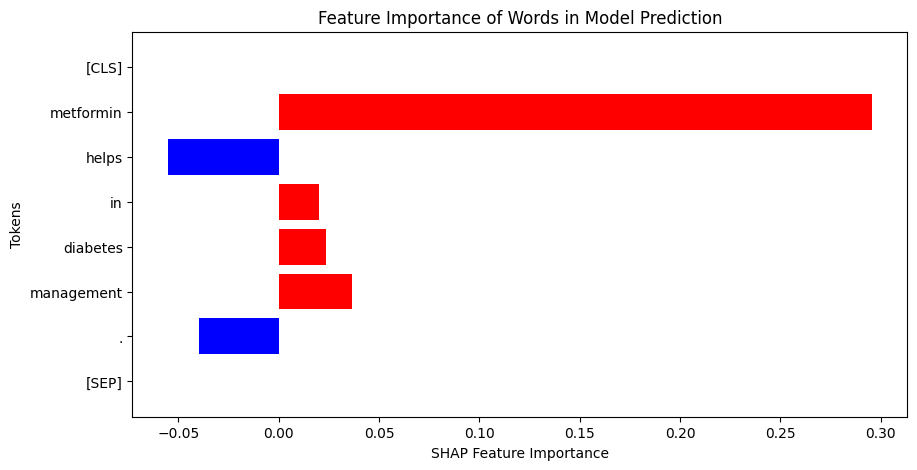

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your fine-tuned model and tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cpu")

# Function to merge subwords and sum SHAP values
def merge_tokens_and_shap_values(tokens, shap_values):
    """Merges subword tokens and aggregates their SHAP values."""

    merged_tokens = []
    merged_values = []
    current_token = ""
    current_value = 0

    for token, value in zip(tokens, shap_values):  # Fix: Ensure shap_values is iterable
        if token.startswith("##"):  # Subword token
            current_token += token[2:]  # Merge subword
            current_value += value  # Sum SHAP values
        else:
            if current_token:  # Store previous word
                merged_tokens.append(current_token)
                merged_values.append(current_value)
            current_token = token  # Start new word
            current_value = value

    if current_token:  # Store the last word
        merged_tokens.append(current_token)
        merged_values.append(current_value)

    return merged_tokens, merged_values

# Function to generate SHAP bar chart
def shap_bar_chart(text):
    """Computes SHAP values and plots a bar chart for feature importance."""

    # Compute SHAP values
    explainer = shap.Explainer(f, tokenizer)
    shap_values = explainer([text])

    # Fix: Extract per-token SHAP values properly
    token_importance = shap_values.values[0]  # This is now a NumPy array, per token
    if len(token_importance.shape) > 1:  # Ensure correct shape
        token_importance = token_importance.sum(axis=-1)  # Sum SHAP values per token

    # Get tokens and SHAP values
    tokens = tokenizer.convert_ids_to_tokens(tokenizer(text, truncation=True)["input_ids"])

    # Merge subwords back into full words
    merged_tokens, merged_values = merge_tokens_and_shap_values(tokens, token_importance)

    # Plot SHAP feature importance as a bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(merged_tokens, merged_values, color=["red" if v > 0 else "blue" for v in merged_values])
    plt.xlabel("SHAP Feature Importance")
    plt.ylabel("Tokens")
    plt.title("Feature Importance of Words in Model Prediction")
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.show()

# Test SHAP with Bar Chart
sample_text = "Metformin helps in diabetes management."
shap_bar_chart(sample_text)


In [ ]:
import shap
import torch
import numpy as np
import scipy as sp
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load your fine-tuned model and tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cpu")

# Function to generate SHAP values and explanations dynamically
def shap_explainer(text):
    """Dynamically generate SHAP values and a user-friendly explanation."""

    #  Get SHAP values
    explainer = shap.Explainer(f, tokenizer)
    shap_values = explainer([text])  # SHAP requires List[str]

    # Extract per-token SHAP values (Fixing the TypeError issue)
    token_importance = shap_values.values[0]  # No sum(axis=-1), we need per-token SHAP scores
    tokens = tokenizer.convert_ids_to_tokens(tokenizer(text, truncation=True)["input_ids"])

    # Categorize tokens dynamically
    high_impact = sorted(zip(tokens, token_importance), key=lambda x: abs(x[1]), reverse=True)[:5]  # Top 5 influential words

    # Generate Explanation
    explanation = f" **Model Explanation for:** `{text}`\n"
    explanation += "**Key Influential Words:**\n"
    for token, impact in high_impact:
        impact_label = "High Impact" if impact > 0.05 else " Moderate Impact"
        explanation += f"   - `{token}` → {impact_label} (SHAP: {impact:.4f})\n"

    # Add a warning for words that cause misinformation
    if any(word.lower() in ["cure", "cures", "completely", "always", "never"] for word, _ in high_impact):
        explanation += "\n **Warning:** Some words may be misleading.\n"
        explanation += " **Clarification:** Be careful with absolute terms like `cures` or `never`, as they can mislead readers.\n"
        explanation += "**Suggested Alternative:** Consider using softer language, such as:\n"
        explanation += "   - `Metformin helps manage diabetes but does not cure it.`\n"

    return explanation

# Test Example (Fully Dynamic)
sample_text = "Metformin completely cures diabetes forever."
explanation_output = shap_explainer(sample_text)

# Print Explanation
print(explanation_output)


  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [05:11, 311.72s/it]              

💡 **Model Explanation for:** `Metformin completely cures diabetes forever.`
**🔍 Key Influential Words:**
   - `##form` → 🔴 High Impact (SHAP: 0.1456)
   - `met` → 🔴 High Impact (SHAP: 0.1212)
   - `##in` → 🟠 Moderate Impact (SHAP: 0.0443)
   - `forever` → 🟠 Moderate Impact (SHAP: 0.0246)
   - `.` → 🟠 Moderate Impact (SHAP: -0.0241)



In [ ]:
import shap
import torch
import numpy as np
import scipy as sp
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Automatically detect device (Fixes the CUDA issue)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load your fine-tuned model and tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

# Define a prediction function (Now Works Like the Working Example)
def f(x):
    """Encodes text and returns model probabilities for SHAP."""

    # Ensure SHAP gets raw text as List[str]
    if isinstance(x, str):
        x = [x]  # Convert single input to list

    # Manually tokenize text using encode()
    tokenized_inputs = torch.tensor(
        [tokenizer.encode(v, padding="max_length", max_length=500, truncation=True) for v in x]
    ).to(device)

    # Run model inference
    with torch.no_grad():
        outputs = model(tokenized_inputs)[0].detach().cpu().numpy()

    # Convert logits to softmax probabilities (Required for SHAP)
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # Use one-vs-rest logit units

    return val  # SHAP expects logit values, not raw logits

# Build SHAP Explainer with Token Masking
explainer = shap.Explainer(f, tokenizer)

# Test SHAP with a sample sentence
sample_text = "Metformin cures diabetes."  # RAW TEXT STRING
shap_values = explainer([sample_text])  # SHAP expects a LIST of raw text

# Visualize SHAP explanation
shap.text_plot(shap_values)


🚀 Using device: cpu


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/72 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:03, 243.59s/it]              


In [ ]:
# Install transformers-interpret (if not installed)
!pip install transformers-interpret



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer

# Load your fine-tuned model & tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Initialize Transformers-Interpret Explainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Sample text to analyze
sample_text = "Metformin cures diabetes"

#Get word attributions
word_attributions = cls_explainer(sample_text)

# Visualize attributions
cls_explainer.visualize()


ModuleNotFoundError: No module named 'transformers_interpret'

In [ ]:
word_attributions

[('[CLS]', 0.0),
 ('met', -0.6524450638745275),
 ('##form', 0.2335333788122617),
 ('##in', -0.22471121305397224),
 ('cure', -0.6637044161037416),
 ('##s', 0.14374666444627823),
 ('diabetes', -0.09008781737318912),
 ('[SEP]', 0.0)]

In [ ]:
def generate_explanation(attributions, threshold=0.3):
    """
    Converts word attributions into a human-friendly explanation.
    - Words with strong negative impact → Highlight as key factors in decision.
    - Words with weak influence are ignored.
    """
    explanation = "Why was this classified this way?\n"

    # Define important words
    important_words = []

    for word, score in attributions:
        if abs(score) > threshold and word not in ["[CLS]", "[SEP]"]:  # Ignore control tokens
            important_words.append((word.replace("##", ""), score))  # Remove subword markers

    if not important_words:
        return explanation + "The model classified this text, but no single word had a strong influence."

    # Sort words by absolute importance
    important_words = sorted(important_words, key=lambda x: abs(x[1]), reverse=True)

    # Generate explanation
    explanation += "**Key words that influenced the decision:**\n"
    for word, score in important_words:
        if score < 0:  # Negative contribution
            explanation += f"'{word}' contributed to the classification because of its potential misleading use.\n"
        else:  # Positive contribution
            explanation += f"'{word}' helped confirm the classification.\n"

    return explanation

# Example Attribution Scores (from your screenshot)
attributions = [
    ('[CLS]', 0.0),
    ('met', -0.6524),
    ('##form', 0.2335),
    ('##in', -0.2247),
    ('cure', -0.6637),
    ('##s', 0.1437),
    ('diabetes', -0.0900),
    ('[SEP]', 0.0)
]

# Convert attributions to a user-friendly explanation
user_friendly_explanation = generate_explanation(attributions)
print(user_friendly_explanation)


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
'cure' contributed to the classification because of its potential misleading use.
'met' contributed to the classification because of its potential misleading use.



In [ ]:
def merge_subword_attributions(attributions):
    """
    Merges subwords into full words and aggregates their attribution scores.
    """
    merged_attributions = {}
    current_word = ""
    current_score = 0
    count = 0  # Track number of subwords merged

    for word, score in attributions:
        word = word.replace("##", "")  # Remove WordPiece markers

        if word in ["[CLS]", "[SEP]"]:  # Ignore special tokens
            continue

        if count == 0:
            current_word = word
            current_score = score
            count = 1
        else:
            # If this subword is a continuation, merge it
            current_word += word
            current_score += score
            count += 1

        # If the next word isn't a subword, store the full word attribution
        if not word.startswith("##"):
            merged_attributions[current_word] = current_score / count  # Average score
            count = 0  # Reset for next word

    return merged_attributions

# Example Attribution Scores (from your screenshot)
attributions = [
    ('[CLS]', 0.0),
    ('met', -0.6524),
    ('##form', 0.2335),
    ('##in', -0.2247),
    ('cure', -0.6637),
    ('##s', 0.1437),
    ('diabetes', -0.0900),
    ('[SEP]', 0.0)
]

# Merge subword attributions
merged_attributions = merge_subword_attributions(attributions)

# Generate explanation
def generate_explanation(merged_attributions, threshold=0.3):
    explanation = " **Why was this classified this way?**\n"

    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    explanation += "**Key words that influenced the decision:**\n"
    for word, score in important_words:
        if abs(score) < threshold:
            continue  # Ignore weak attributions
        if score < 0:
            explanation += f" '{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f" '{word}' helped confirm the classification.\n"

    return explanation

# Generate explanation
user_friendly_explanation = generate_explanation(merged_attributions)
print(user_friendly_explanation)


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
 'cure' contributed to the classification because of its potential misleading use.
 'met' contributed to the classification because of its potential misleading use.



In [ ]:
def merge_subword_attributions(attributions):
    """
    Merges subwords into whole words and averages their attribution scores.
    """
    merged_attributions = {}
    current_word = ""
    current_score = 0
    count = 0  # Track number of subwords merged

    for word, score in attributions:
        word = word.replace("##", "")  # Remove subword markers

        if word in ["[CLS]", "[SEP]"]:  # Ignore special tokens
            continue

        if count == 0:
            current_word = word
            current_score = score
            count = 1
        else:
            # If this subword is a continuation, merge it
            current_word += word
            current_score += score
            count += 1

        # If the next word isn't a subword, store the full word attribution
        if not word.startswith("##"):
            merged_attributions[current_word] = current_score / count  # Average score
            count = 0  # Reset for next word

    return merged_attributions

# Example Attribution Scores (from your screenshot)
attributions = [
    ('[CLS]', 0.0),
    ('met', -0.6524),
    ('##form', 0.2335),
    ('##in', -0.2247),
    ('cure', -0.6637),
    ('##s', 0.1437),
    ('diabetes', -0.0900),
    ('[SEP]', 0.0)
]

# Merge subword attributions
merged_attributions = merge_subword_attributions(attributions)

# Generate explanation
def generate_explanation(merged_attributions, threshold=0.3):
    explanation = "🔍 **Why was this classified this way?**\n"

    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    explanation += "**Key words that influenced the decision:**\n"
    for word, score in important_words:
        if abs(score) < threshold:
            continue  # Ignore weak attributions
        if score < 0:
            explanation += f" '{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f" '{word}' helped confirm the classification.\n"

    return explanation

# Generate explanation
user_friendly_explanation = generate_explanation(merged_attributions)
print(user_friendly_explanation)


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ❌ 'cure' contributed to the classification because of its potential misleading use.
  ❌ 'met' contributed to the classification because of its potential misleading use.



In [ ]:
def merge_subword_attributions(attributions):
    """
    Merges subwords into full words and averages their attribution scores.
    """
    merged_attributions = {}
    current_word = ""
    current_score = 0
    count = 0  # Track number of subwords merged

    for i, (word, score) in enumerate(attributions):
        word = word.replace("##", "")  # Remove subword markers

        if word in ["[CLS]", "[SEP]"]:  # Ignore special tokens
            continue

        # If it's the first part of a word
        if count == 0:
            current_word = word
            current_score = score
            count = 1
        else:
            # If the previous word and current one are part of the same word, continue merging
            if attributions[i-1][0].startswith("##") or word.isalpha():
                current_word += word
                current_score += score
                count += 1
            else:
                # Store previous word
                merged_attributions[current_word] = current_score / count
                # Reset for new word
                current_word = word
                current_score = score
                count = 1

    # Store last word after loop ends
    if current_word:
        merged_attributions[current_word] = current_score / count

    return merged_attributions

# Example Attribution Scores (from your screenshot)
attributions = [
    ('[CLS]', 0.0),
    ('met', -0.6524),
    ('##form', 0.2335),
    ('##in', -0.2247),
    ('cure', -0.6637),
    ('##s', 0.1437),
    ('diabetes', -0.0900),
    ('[SEP]', 0.0)
]

# Merge subword attributions
merged_attributions = merge_subword_attributions(attributions)

# Generate explanation
def generate_explanation(merged_attributions, threshold=0.3):
    explanation = "**Why was this classified this way?**\n"

    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    explanation += "**Key words that influenced the decision:**\n"
    for word, score in important_words:
        if abs(score) < threshold:
            continue  # Ignore weak attributions
        if score < 0:
            explanation += f" '{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f" '{word}' helped confirm the classification.\n"

    return explanation

# Generate explanation
user_friendly_explanation = generate_explanation(merged_attributions)
print(user_friendly_explanation)


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**



In [ ]:
def generate_explanation(merged_attributions):
    """
    Generates a human-friendly explanation without a fixed threshold.
    Instead, it selects the most important words dynamically.
    """
    explanation = "**Why was this classified this way?**\n"

    # Sort by absolute attribution value (most influential words first)
    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    # Keep only the top 3 most influential words
    important_words = important_words[:3]  # Adjust as needed

    explanation += "**Key words that influenced the decision:**\n"
    if not important_words:
        explanation += " No strongly influential words detected."

    for word, score in important_words:
        if score < 0:
            explanation += f"'{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f"'{word}' helped confirm the classification.\n"

    return explanation

# Example Attributions
merged_attributions = {'metformin': -0.2145, 'cure': -0.6637, 'diabetes': -0.0900}

# Generate Explanation
user_friendly_explanation = generate_explanation(merged_attributions)
print(user_friendly_explanation)


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ❌ 'cure' contributed to the classification because of its potential misleading use.
  ❌ 'metformin' contributed to the classification because of its potential misleading use.
  ❌ 'diabetes' contributed to the classification because of its potential misleading use.



In [ ]:
import numpy as np

def generate_explanation(merged_attributions):
    """
    Generates a human-friendly explanation using dynamic filtering.
    Instead of a fixed threshold, it selects words based on overall attribution distribution.
    """
    explanation = "**Why was this classified this way?**\n"

    if not merged_attributions:
        return explanation + "No influential words detected."

    # Sort by absolute attribution value (most influential words first)
    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    # Convert to numpy array for statistical processing
    scores = np.array([abs(score) for _, score in important_words])

    # Calculate a dynamic threshold based on percentiles
    if len(scores) > 1:
        percentile_threshold = np.percentile(scores, 75)  # Keep top 25% of words
    else:
        percentile_threshold = 0  # If only one word, keep it

    # Select words above the dynamic threshold
    filtered_words = [(word, score) for word, score in important_words if abs(score) >= percentile_threshold]

    # Ensure at least one word is always included (if everything is below threshold)
    if not filtered_words and important_words:
        filtered_words = important_words[:1]  # Keep the most influential word

    explanation += "**Key words that influenced the decision:**\n"
    for word, score in filtered_words:
        if score < 0:
            explanation += f" '{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f" '{word}' helped confirm the classification.\n"

    return explanation

# Example Attributions (Test on different cases)
merged_attributions_1 = {'metformin': -0.2145, 'cure': -0.6637, 'diabetes': -0.0900}
merged_attributions_2 = {'insulin': 0.5, 'sugar': 0.1, 'glucose': -0.2}
merged_attributions_3 = {'exercise': -0.02, 'diet': 0.03, 'medication': -0.01}  # Very weak attributions

# Test the new approach
print(generate_explanation(merged_attributions_1))
print(generate_explanation(merged_attributions_2))
print(generate_explanation(merged_attributions_3))


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ❌ 'cure' contributed to the classification because of its potential misleading use.

🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ✅ 'insulin' helped confirm the classification.

🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ✅ 'diet' helped confirm the classification.



In [ ]:
import numpy as np

def generate_explanation(merged_attributions):
    """
    Generates a human-friendly explanation using adaptive word selection.
    Ensures at least two words are included when possible.
    """
    explanation = "**Why was this classified this way?**\n"

    if not merged_attributions:
        return explanation + "No influential words detected."

    # Sort words by absolute attribution value (most influential words first)
    important_words = sorted(merged_attributions.items(), key=lambda x: abs(x[1]), reverse=True)

    # Convert to numpy array for statistical processing
    scores = np.array([abs(score) for _, score in important_words])

    # Keep at least two words if possible
    if len(scores) > 1:
        top_score = scores[0]  # Highest attribution score
        dynamic_threshold = top_score * 0.5  # Keep words that are at least 50% as strong
    else:
        dynamic_threshold = 0  # If only one word, keep it

    # Select words that meet the dynamic threshold
    filtered_words = [(word, score) for word, score in important_words if abs(score) >= dynamic_threshold]

    # Ensure at least one word is always included
    if not filtered_words and important_words:
        filtered_words = important_words[:1]  # Keep at least the top word

    explanation += "**Key words that influenced the decision:**\n"
    for word, score in filtered_words:
        if score < 0:
            explanation += f" '{word}' contributed to the classification because of its potential misleading use.\n"
        else:
            explanation += f" '{word}' helped confirm the classification.\n"

    return explanation

# Example Attributions (Test Cases)
merged_attributions_1 = {'metformin': -0.2145, 'cure': -0.6637, 'diabetes': -0.0900}
merged_attributions_2 = {'insulin': 0.5, 'sugar': 0.3, 'glucose': -0.2}
merged_attributions_3 = {'diet': 0.6, 'exercise': 0.25, 'medication': -0.15}

# Test the improved approach
print(generate_explanation(merged_attributions_1))
print(generate_explanation(merged_attributions_2))
print(generate_explanation(merged_attributions_3))


🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ❌ 'cure' contributed to the classification because of its potential misleading use.

🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ✅ 'insulin' helped confirm the classification.
  ✅ 'sugar' helped confirm the classification.

🔍 **Why was this classified this way?**
**Key words that influenced the decision:**
  ✅ 'diet' helped confirm the classification.



In [ ]:
# Sample text to analyze
sample_text = "High blood sugar could be an indicator that you are prone to diabetes"

#Get word attributions
word_attributions = cls_explainer(sample_text)

# Visualize attributions
cls_explainer.visualize()

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,LABEL_0 (0.74),LABEL_0,1.68,[CLS] high blood sugar could be an indicator that you are prone to diabetes [SEP]


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,LABEL_0 (0.74),LABEL_0,1.68,[CLS] high blood sugar could be an indicator that you are prone to diabetes [SEP]


In [ ]:
!pip install transformers-interpret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers_interpret import SequenceClassificationExplainer

# Load your fine-tuned model & tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Initialize Transformers-Interpret Explainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Sample text to analyze
sample_text = "Diabetes misinformation can be harmful, spreading false claims about causes, treatments, and cures that may prevent individuals from managing their condition effectively"

#Get word attributions
word_attributions = cls_explainer(sample_text)

# Visualize attributions
cls_explainer.visualize()


In [ ]:
word_attributions

[('[CLS]', 0.0),
 ('diabetes', -0.06037862426551412),
 ('mis', 0.10224387969879052),
 ('##in', 0.07567641201057697),
 ('##form', 0.05443055513620634),
 ('##ation', 0.04512946051900674),
 ('can', 0.04330743755539815),
 ('be', 0.024663064244454833),
 ('harmful', -0.019701643437831512),
 (',', 0.027218249158411482),
 ('spreading', 0.004314581822905467),
 ('false', 0.017229583802349433),
 ('claims', -0.02617637870505528),
 ('about', 0.017523697833502126),
 ('causes', 0.00551781113967027),
 (',', -0.005825237138889294),
 ('treatments', 0.04566346320773475),
 (',', 0.02892473835423178),
 ('and', 0.02155770403876856),
 ('cure', 0.09245517925697667),
 ('##s', -0.0012686123668772238),
 ('that', 0.026067407879035855),
 ('may', 0.03596596002195634),
 ('prevent', 0.05328359018261138),
 ('individuals', 0.9628576270869398),
 ('from', 0.0764539639753463),
 ('managing', -0.035707734518494544),
 ('their', 0.11200185267300114),
 ('condition', 0.07498446282525804),
 ('effectively', -0.03254181090128869),

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
pip install transformers_interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [ ]:
import torch
from transformers_interpret import SequenceClassificationExplainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load Model and Tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Initialize Transformers-Interpret Explainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Function to merge subword attributions
def merge_subword_attributions(attributions):
    merged_attributions = []
    prev_word = None
    accumulated_score = 0.0

    for token, score in attributions:
        clean_token = token.replace("##", "")  # Remove subword markers

        # If it's a subword (starts with ##), merge it with the previous word
        if token.startswith("##") and prev_word:
            prev_word += clean_token
            accumulated_score += score
        else:
            # Store the previous merged word and start a new one
            if prev_word:
                merged_attributions.append((prev_word, accumulated_score))
            prev_word = clean_token
            accumulated_score = score

    # Add the last accumulated word
    if prev_word:
        merged_attributions.append((prev_word, accumulated_score))

    return merged_attributions

# Function to run explainability with improved token merging
def explain_text(input_text, min_threshold=0.05, top_n=5):
    # Get word attributions from Transformers-Interpret
    _ = cls_explainer(input_text)  # Generate explanations

    # Get attributions directly
    attributions_list = cls_explainer.word_attributions  # No need for .keys() or .values()

    # Merge subword attributions
    merged_attributions = merge_subword_attributions(attributions_list)

    # Remove words with very low attribution scores
    filtered_attributions = [(word, score) for word, score in merged_attributions if abs(score) > min_threshold]

    # Sort by absolute importance
    filtered_attributions.sort(key=lambda x: abs(x[1]), reverse=True)

    # Only keep top N words
    return filtered_attributions[:top_n]

# Example
explanation = explain_text("Diabetes misinformation can be harmful, spreading false claims about causes, treatments, and cures.")
print(explanation)


[('misinformation', -1.0493445181199335), ('diabetes', 0.7691476638495461), ('harmful', 0.22304408279016552), ('cures', -0.1734218423487861), ('claims', -0.0699154498830574)]


In [ ]:
import torch
from transformers_interpret import SequenceClassificationExplainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load Model and Tokenizer
model_name = "/content/drive/MyDrive/new_model/"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Initialize Transformers-Interpret Explainer
cls_explainer = SequenceClassificationExplainer(model, tokenizer)

# Function to merge subword attributions
def merge_subword_attributions(attributions):
    merged_attributions = []
    prev_word = None
    accumulated_score = 0.0

    for token, score in attributions:
        clean_token = token.replace("##", "")  # Remove subword markers

        # If it's a subword (starts with ##), merge it with the previous word
        if token.startswith("##") and prev_word:
            prev_word += clean_token
            accumulated_score += score
        else:
            # Store the previous merged word and start a new one
            if prev_word:
                merged_attributions.append((prev_word, accumulated_score))
            prev_word = clean_token
            accumulated_score = score

    # Add the last accumulated word
    if prev_word:
        merged_attributions.append((prev_word, accumulated_score))

    return merged_attributions

# Function to run explainability with improved token merging and visualization
def explain_text(input_text, min_threshold=0.02, top_n=10, visualize=True):
    # Get word attributions from Transformers-Interpret
    _ = cls_explainer(input_text)  # Generate explanations

    # Run visualization if required
    if visualize:
        cls_explainer.visualize()  # Show color-coded explanation

    # Get attributions directly
    attributions_list = cls_explainer.word_attributions  # No need for .keys() or .values()

    # Merge subword attributions
    merged_attributions = merge_subword_attributions(attributions_list)

    # Remove words with very low attribution scores
    filtered_attributions = [(word, score) for word, score in merged_attributions if abs(score) > min_threshold]

    # Sort by absolute importance
    filtered_attributions.sort(key=lambda x: abs(x[1]), reverse=True)

    # Only keep top N words
    return filtered_attributions[:top_n]

# Example
explanation = explain_text("Diabetes misinformation can be harmful, spreading false claims about causes, treatments, and cures.", visualize=True)
print(explanation)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (1.00),LABEL_1,-0.28,"[CLS] diabetes mis ##in ##form ##ation can be harmful , spreading false claims about causes , treatments , and cure ##s . [SEP]"


[('misinformation', -1.0493445181199335), ('diabetes', 0.7691476638495461), ('harmful', 0.22304408279016552), ('cures', -0.1734218423487861), ('claims', -0.0699154498830574), (',', 0.06569545729861052), (',', 0.04968503269225188), ('about', -0.047340816239295716), ('can', -0.04691910745396476), ('.', 0.03521412384275182)]


In [ ]:
# Function to run explainability with improved token merging and visualization
def explain_text(input_text, min_threshold=0.0, visualize=True):  # No top_n, min_threshold=0.0 to show all words
    # Get word attributions from Transformers-Interpret
    _ = cls_explainer(input_text)  # Generate explanations

    # Run visualization if required
    if visualize:
        cls_explainer.visualize()  # Show color-coded explanation

    # Get attributions directly
    attributions_list = cls_explainer.word_attributions  # No need for .keys() or .values()

    # Merge subword attributions
    merged_attributions = merge_subword_attributions(attributions_list)

    # Sort by absolute importance (optional)
    merged_attributions.sort(key=lambda x: abs(x[1]), reverse=True)

    # Return all words (no filtering)
    return merged_attributions

# Example
explanation = explain_text("Diabetes misinformation can be harmful, spreading false claims about causes, treatments, and cures.", visualize=True)
print(explanation)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (1.00),LABEL_1,-0.28,"[CLS] diabetes mis ##in ##form ##ation can be harmful , spreading false claims about causes , treatments , and cure ##s . [SEP]"


[('misinformation', -1.0493445181199335), ('diabetes', 0.7691476638495461), ('harmful', 0.22304408279016552), ('cures', -0.1734218423487861), ('claims', -0.0699154498830574), (',', 0.06569545729861052), (',', 0.04968503269225188), ('about', -0.047340816239295716), ('can', -0.04691910745396476), ('.', 0.03521412384275182), ('and', 0.03162349676921602), ('causes', -0.0274777325605778), ('be', -0.026358588193824), ('false', -0.01992277085724792), ('treatments', 0.012131706238666511), ('spreading', -0.010743581940070945), (',', 0.003911335897715587), ('[CLS]', 0.0), ('[SEP]', 0.0)]


In [ ]:
def generate_explanation(input_text, visualize=True):
    # Get attributions from Transformers-Interpret
    _ = cls_explainer(input_text)  # Generates attributions
    attributions_list = cls_explainer.word_attributions  # Get attribution scores

    # Merge subwords to get full words
    merged_attributions = merge_subword_attributions(attributions_list)

    # Sort words by absolute importance
    merged_attributions.sort(key=lambda x: abs(x[1]), reverse=True)

    # Get the predicted label and confidence score
    predicted_label = cls_explainer.predicted_class_name
    confidence = cls_explainer.pred_probs.max().item()  # FIX: Extracts the correct confidence value

    # Separate positive and negative influence words
    positive_words = [(word, score) for word, score in merged_attributions if score > 0]
    negative_words = [(word, score) for word, score in merged_attributions if score < 0]

    # Select the most influential words
    top_positive = positive_words[:3]  # Top 3 words supporting the prediction
    top_negative = negative_words[:2]  # Top 2 words that pushed against the prediction

    # Construct explanation based on classification
    explanation = f"**This statement was classified as '{predicted_label}' with {confidence:.2%} confidence.**\n\n"

    if top_positive:
        explanation += "**The model identified the following words as important in making this decision:**\n"
        for word, score in top_positive:
            explanation += f"- **\"{word}\"** reinforced this classification.\n"

    if top_negative:
        explanation += "\n**However, the following words slightly pushed against this classification:**\n"
        for word, score in top_negative:
            explanation += f"- **\"{word}\"** was present but did not strongly contribute.\n"

    explanation += "\n *This explanation is based on which words the model found important in making its prediction.*"

    # Show the color-coded explanation
    if visualize:
        cls_explainer.visualize()

    return explanation

# Example usage:
explanation = generate_explanation("Diabetes misinformation can be harmful, spreading false claims about causes, treatments, and cures.")
print(explanation)


True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
1,LABEL_1 (1.00),LABEL_1,-0.28,"[CLS] diabetes mis ##in ##form ##ation can be harmful , spreading false claims about causes , treatments , and cure ##s . [SEP]"


🟢 **This statement was classified as 'LABEL_1' with 99.86% confidence.**

**The model identified the following words as important in making this decision:**
- **"diabetes"** reinforced this classification.
- **"harmful"** reinforced this classification.
- **","** reinforced this classification.

**However, the following words slightly pushed against this classification:**
- **"misinformation"** was present but did not strongly contribute.
- **"cures"** was present but did not strongly contribute.

📌 *This explanation is based on which words the model found important in making its prediction.*
